In [1]:
from skimage.feature import hog
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
# for scikit-learn >= 0.18 use:
from sklearn.model_selection import train_test_split
# from sklearn.cross_validation import train_test_split
from scipy.ndimage.measurements import label
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from moviepy.editor import VideoFileClip
from IPython.display import HTML
import numpy as np
import pickle
import cv2
import glob
import time

%matplotlib inline

print('Imported modules')

Imported modules


### Loading images

In [2]:
cars = glob.glob("./vehicles/*/*.png")
non_cars = glob.glob("./non-vehicles/*/*.png")
print('Number of Car images', len(cars))
print('Number of Non-Car images', len(non_cars))

Number of Car images 8792
Number of Non-Car images 8968


### Show Cars and Non Cars images

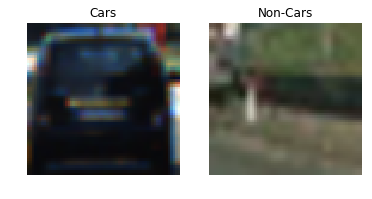

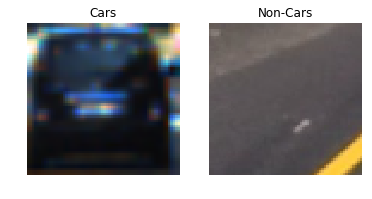

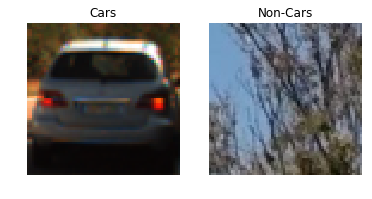

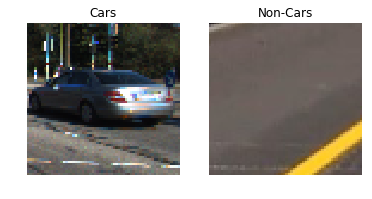

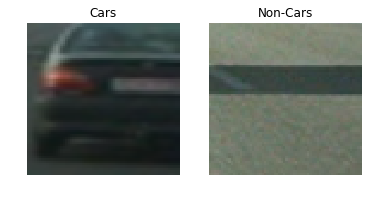

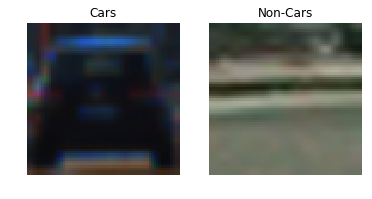

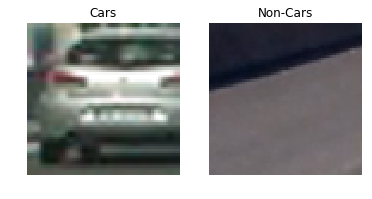

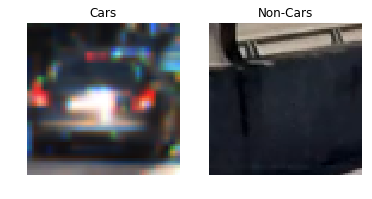

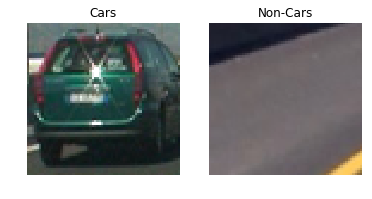

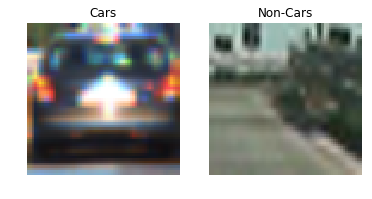

In [3]:
for file in range(10):
    image_cars = cv2.imread(cars[np.random.randint(0,len(cars))])
    image_cars  = cv2.cvtColor(image_cars , cv2.COLOR_BGR2RGB)
    
    image_non_cars = cv2.imread(non_cars[np.random.randint(0,len(non_cars))])
    image_non_cars = cv2.cvtColor(image_non_cars, cv2.COLOR_BGR2RGB)

#     plt.figure(figsize=(10,10))
    plt.subplot(1,2,1)
    plt.imshow(image_cars)
    plt.axis('off')
    plt.title('Cars')
    plt.subplot(1,2,2)
    plt.imshow(image_non_cars)
    plt.title('Non-Cars')
    plt.axis('off')
    plt.show()

## Extract Features

### Histogram of oriented gradients (HOG)

In [4]:
#4
def get_hog_features(img, orient, pix_per_cell, cell_per_block, 
                        vis=False, feature_vec=True):
    # Call with two outputs if vis==True
    if vis == True:
        features, hog_image = hog(img, orientations=orient, 
                                  pixels_per_cell=(pix_per_cell, pix_per_cell),
                                  cells_per_block=(cell_per_block, cell_per_block), 
                                  transform_sqrt=False, 
                                  visualise=vis, feature_vector=feature_vec)
        return features, hog_image
    # Otherwise call with one output
    else:      
        features = hog(img, orientations=orient, 
                       pixels_per_cell=(pix_per_cell, pix_per_cell),
                       cells_per_block=(cell_per_block, cell_per_block), 
                       transform_sqrt=False, 
                       visualise=vis, feature_vector=feature_vec)
        return features

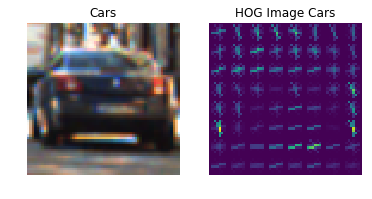

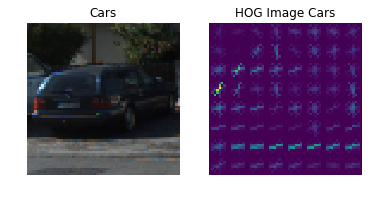

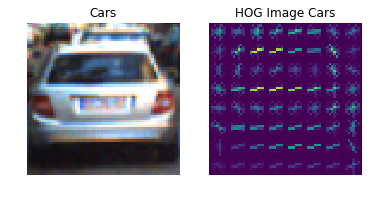

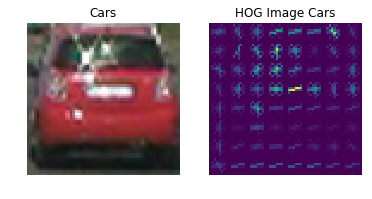

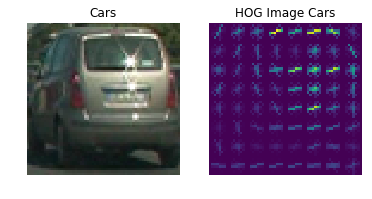

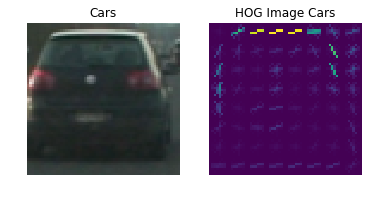

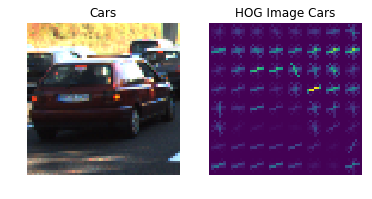

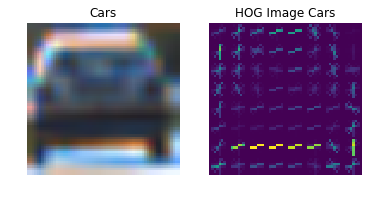

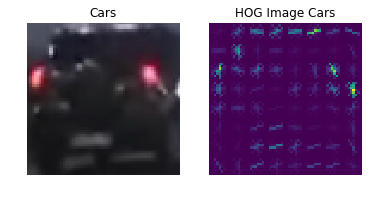

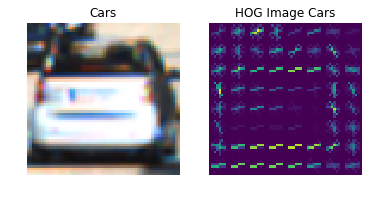

In [5]:
for file in range(10):
    image_cars = cv2.imread(cars[np.random.randint(0,len(cars))])
    image_cars  = cv2.cvtColor(image_cars , cv2.COLOR_BGR2RGB)
    
    image_non_cars = cv2.imread(non_cars[np.random.randint(0,len(non_cars))])
    image_non_cars = cv2.cvtColor(image_non_cars, cv2.COLOR_BGR2RGB)

    features, hog_image = get_hog_features(image_cars[:,:,2],9,8,8,vis=True,feature_vec=True)
        
    plt.subplot(1,2,1)
    plt.imshow(image_cars)
    plt.axis('off')
    plt.title('Cars')
    plt.subplot(1,2,2)
    plt.imshow(hog_image)
    plt.title('HOG Image Cars')
    plt.axis('off')
    plt.show()

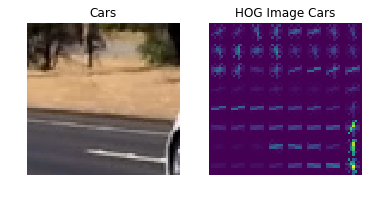

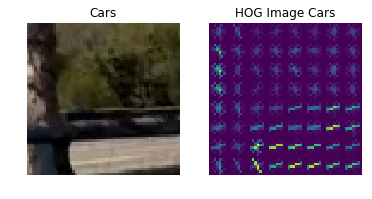

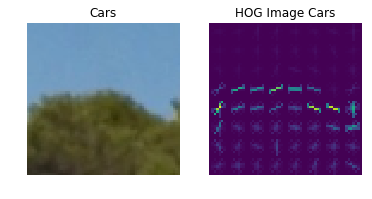

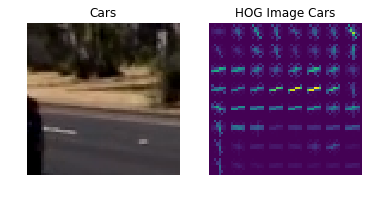

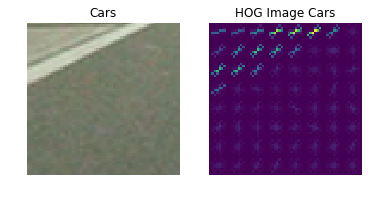

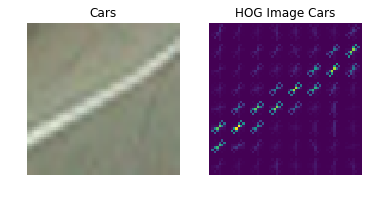

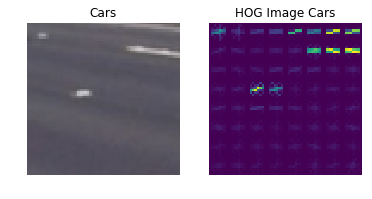

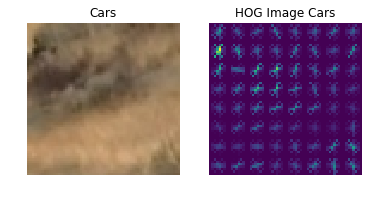

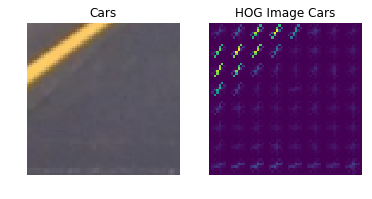

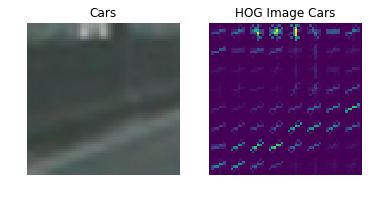

In [6]:
for file in range(10):
       
    image_non_cars = cv2.imread(non_cars[np.random.randint(0,len(non_cars))])
    image_non_cars = cv2.cvtColor(image_non_cars, cv2.COLOR_BGR2RGB)

    features, hog_image_non_cars = get_hog_features(image_non_cars[:,:,2],9,8,8,vis=True,feature_vec=True)
        
    plt.subplot(1,2,1)
    plt.imshow(image_non_cars)
    plt.axis('off')
    plt.title('Non Cars')
    plt.subplot(1,2,2)
    plt.imshow(hog_image_non_cars)
    plt.title('HOG Image Non Cars')
    plt.axis('off')
    plt.show()

### Color

In [7]:
#7

def color_histmg, nbins=32, bins_range=(0, 256)):
    # Compute the histogram of the color channels separately
    channel1_hist = np.histogram(img[:,:,0], bins=nbins, range=bins_range)
    channel2_hist = np.histogram(img[:,:,1], bins=nbins, range=bins_range)
    channel3_hist = np.histogram(img[:,:,2], bins=nbins, range=bins_range)
    # Concatenate the histograms into a single feature vector
    hist_features = np.concatenate((channel1_hist[0], channel2_hist[0], channel3_hist[0]))
    # Return the individual histograms, bin_centers and feature vector
    return hist_features

# Define a function to compute binned color features  
def bin_spatial(img, size=(32, 32)):
    # Use cv2.resize().ravel() to create the feature vector
    features = cv2.resize(img, size).ravel() 
    # Return the feature vector
    return features

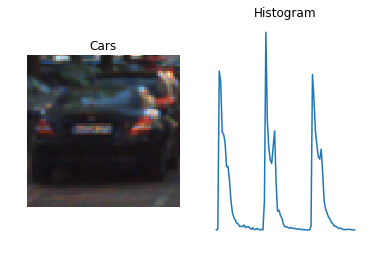

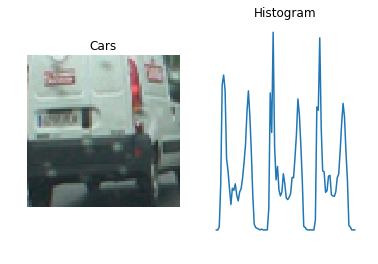

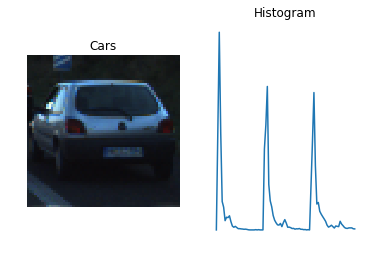

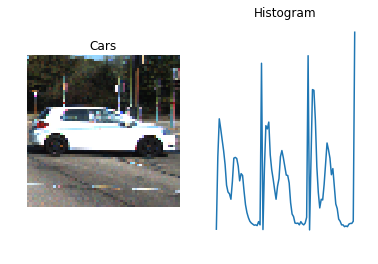

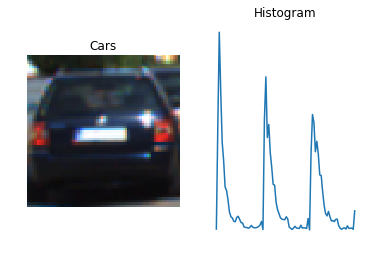

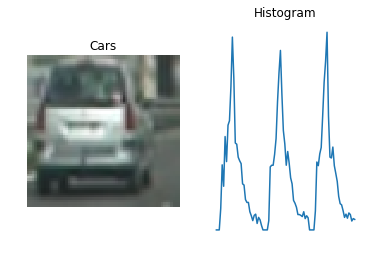

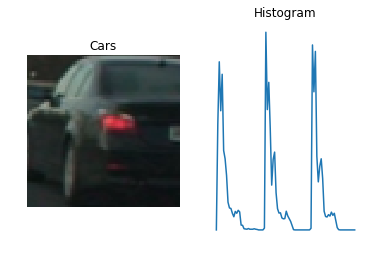

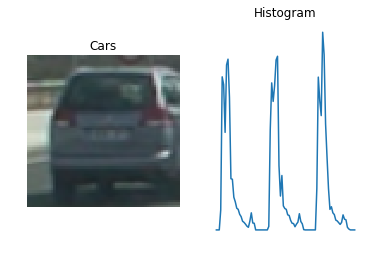

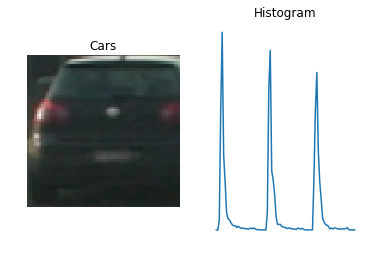

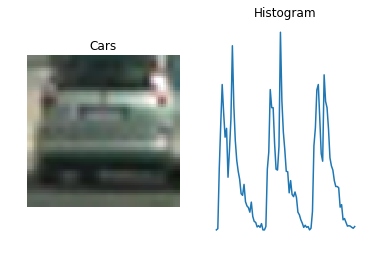

In [8]:
for file in range(10):
    image_cars = cv2.imread(cars[np.random.randint(0,len(cars))])
    image_cars  = cv2.cvtColor(image_cars , cv2.COLOR_BGR2RGB)
    
    image_non_cars = cv2.imread(non_cars[np.random.randint(0,len(non_cars))])
    image_non_cars = cv2.cvtColor(image_non_cars, cv2.COLOR_BGR2RGB)

    histogram = color_hist(image_cars)
        
    plt.subplot(1,2,1)
    plt.imshow(image_cars)
    plt.axis('off')
    plt.title('Cars')
    plt.subplot(1,2,2)
    plt.plot(histogram)
    plt.title('Histogram')
    plt.axis('off')
    plt.show()

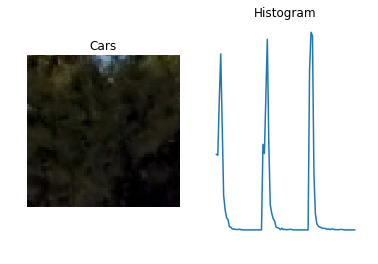

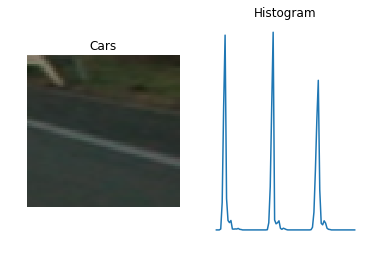

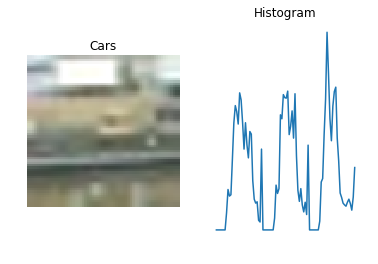

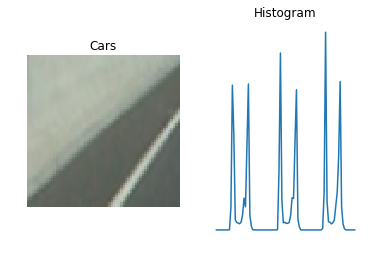

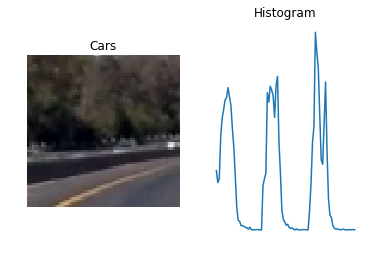

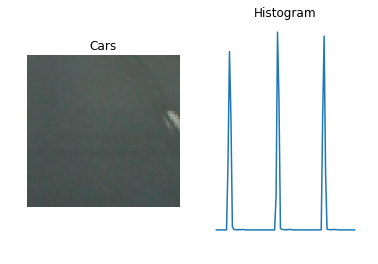

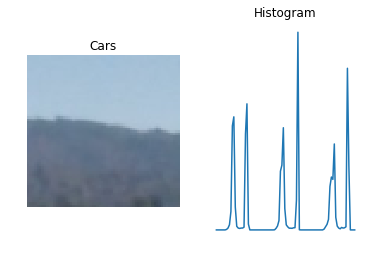

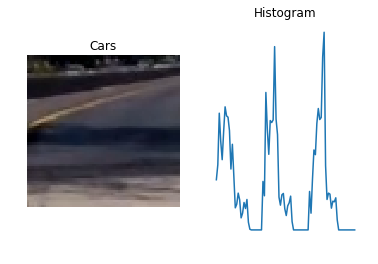

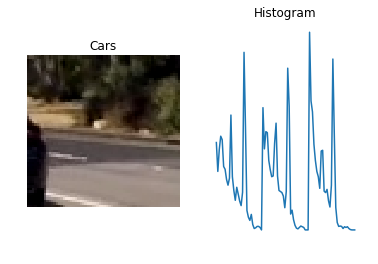

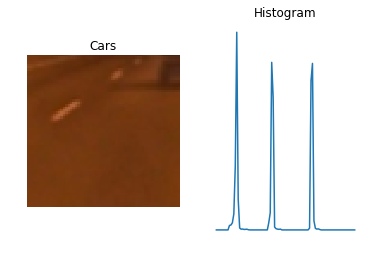

In [9]:
for file in range(10):
    image_cars = cv2.imread(cars[np.random.randint(0,len(cars))])
    image_cars  = cv2.cvtColor(image_cars , cv2.COLOR_BGR2RGB)
    
    image_non_cars = cv2.imread(non_cars[np.random.randint(0,len(non_cars))])
    image_non_cars = cv2.cvtColor(image_non_cars, cv2.COLOR_BGR2RGB)

    histogram = color_hist(image_non_cars)
        
    plt.subplot(1,2,1)
    plt.imshow(image_non_cars)
    plt.axis('off')
    plt.title('Non Cars')
    plt.subplot(1,2,2)
    plt.plot(histogram)
    plt.title('Histogram Non Cars')
    plt.axis('off')
    plt.show()

## Extract Features

In [10]:
# 10
# Define a function to extract features from a list of images
# Have this function call bin_spatial() and color_hist()
def extract_features(imgs, cspace='RGB', spatial_size=(32, 32),
                        hist_bins=32, orient=9, 
                        pix_per_cell=8, cell_per_block=2, hog_channel=0,
                        spatial_feat=True, hist_feat=True, hog_feat=True):
    # Create a list to append feature vectors to
    features = []
    # Iterate through the list of images
    for file in imgs:
        file_features = []
        # Read in each one by one
        image = mpimg.imread(file)
        # apply color conversion if other than 'RGB'
        if cspace != 'RGB':
            if cspace == 'HSV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
            elif cspace == 'LUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2LUV)
            elif cspace == 'HLS':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
            elif cspace == 'YUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
            elif cspace == 'YCrCb':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YCrCb)
        else: feature_image = np.copy(image)      

        if spatial_feat == True:
            spatial_features = bin_spatial(feature_image, size=spatial_size)
            file_features.append(spatial_features)
        if hist_feat == True:
            # Apply color_hist()
            hist_features = color_hist(feature_image, nbins=hist_bins)
            file_features.append(hist_features)
        if hog_feat == True:
        # Call get_hog_features() with vis=False, feature_vec=True
            if hog_channel == 'ALL':
                hog_features = []
                for channel in range(feature_image.shape[2]):
                    hog_features.append(get_hog_features(feature_image[:,:,channel], 
                                        orient, pix_per_cell, cell_per_block, 
                                        vis=False, feature_vec=True))
                hog_features = np.ravel(hog_features)        
            else:
                hog_features = get_hog_features(feature_image[:,:,hog_channel], orient, 
                            pix_per_cell, cell_per_block, vis=False, feature_vec=True)
            # Append the new feature vector to the features list
            file_features.append(hog_features)
        features.append(np.concatenate(file_features))
    # Return list of feature vectors
    return features

In [11]:
print('Number of Car images', len(cars))
print('Number of Non-Car images', len(non_cars))
# print(non_cars[:8792])

Number of Car images 8792
Number of Non-Car images 8968


In [12]:
cars_test = cars
non_cars_test = non_cars[:8792]
print('Number of Car images', len(cars_test))
print('Number of Non-Car images', len(non_cars_test))


Number of Car images 8792
Number of Non-Car images 8792


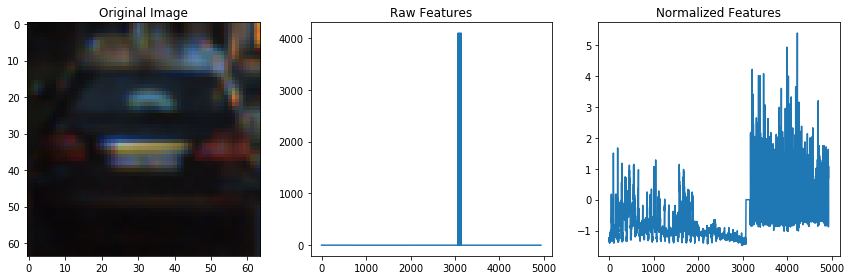

In [13]:
# Normalize features
car_features_test = extract_features(cars_test, cspace='RGB', spatial_size=(32, 32), hist_bins=32)
notcar_features_test = extract_features(non_cars_test, cspace='RGB', spatial_size=(32, 32), hist_bins=32)

if len(car_features_test) > 0:
    # Create an array stack of feature vectors
    X = np.vstack((car_features_test, notcar_features_test)).astype(np.float64)                        
    # Fit a per-column scaler
    X_scaler = StandardScaler().fit(X)
    # Apply the scaler to X
    scaled_X = X_scaler.transform(X)
    car_ind = np.random.randint(0, len(cars))
    # Plot an example of raw and scaled features
    fig = plt.figure(figsize=(12,4))
    plt.subplot(131)
    plt.imshow(mpimg.imread(cars[car_ind]))
    plt.title('Original Image')
    plt.subplot(132)
    plt.plot(X[car_ind])
    plt.title('Raw Features')
    plt.subplot(133)
    plt.plot(scaled_X[car_ind])
    plt.title('Normalized Features')
    fig.tight_layout()
else: 
    print('Your function only returns empty feature vectors...')

## HOG and Color Classify

## Train a Classifier

In [36]:
#14
### TODO: Tweak these parameters and see how the results change.
color_space = 'YUV' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
orient = 11 # HOG orientations
pix_per_cell = 16 # HOG pixels per cell
cell_per_block = 2 # HOG cells per block
hog_channel = 'ALL' # Can be 0, 1, 2, or "ALL"
spatial_size = (32, 32) # Spatial binning dimensions
hist_bins = 16    # Number of histogram bins
spatial_feat = True # Spatial features on or off
hist_feat = True # Histogram features on or off
hog_feat = True # HOG features on or off
y_start_stop = [None, None] # Min and max in y to search in slide_window()

car_features = extract_features(cars, cspace=color_space, 
                        spatial_size=spatial_size, hist_bins=hist_bins, 
                        orient=orient, pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat)
notcar_features = extract_features(non_cars, cspace=color_space, 
                        spatial_size=spatial_size, hist_bins=hist_bins, 
                        orient=orient, pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat)

X = np.vstack((car_features, notcar_features)).astype(np.float64)                        
# Fit a per-column scaler
X_scaler = StandardScaler().fit(X)
# Apply the scaler to X
scaled_X = X_scaler.transform(X)

# Define the labels vector
y = np.hstack((np.ones(len(car_features)), np.zeros(len(notcar_features))))

# Split up data into randomized training and test sets
rand_state = np.random.randint(0, 100)
X_train, X_test, y_train, y_test = train_test_split(
    scaled_X, y, test_size=0.2, random_state=rand_state)

print('Using:',orient,'orientations',pix_per_cell,
    'pixels per cell and', cell_per_block,'cells per block')
print('Feature vector length:', len(X_train[0]))

# Use a linear SVC 
svc = LinearSVC()
# Check the training time for the SVC
t=time.time()
svc.fit(X_train, y_train)
t2 = time.time()
print(round(t2-t, 2), 'Seconds to train SVC...')
# Check the score of the SVC
print('Test Accuracy of SVC = ', round(svc.score(X_test, y_test), 4))
# Check the prediction time for a single sample
t=time.time()

Using: 11 orientations 16 pixels per cell and 2 cells per block
Feature vector length: 4308
13.44 Seconds to train SVC...
Test Accuracy of SVC =  0.9896


In [37]:
print(len(X))
print(len(scaled_X))
print(len(y))
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))
# print(len(svc))

17760
17760
17760
14208
3552
14208
3552


## Method for Using Classifier to Detect Cars in an Image

In [16]:
# Here is your draw_boxes function from the previous exercise
def draw_boxes(img, bboxes, color=(0, 0, 255), thick=6):
    # Make a copy of the image
    imcopy = np.copy(img)
    # Iterate through the bounding boxes
    for bbox in bboxes:
        # Draw a rectangle given bbox coordinates
        cv2.rectangle(imcopy, bbox[0], bbox[1], color, thick)
    # Return the image copy with boxes drawn
    return imcopy
    
    
# Define a function that takes an image,
# start and stop positions in both x and y, 
# window size (x and y dimensions),  
# and overlap fraction (for both x and y)
def slide_window(img, x_start_stop=[None, None], y_start_stop=[None, None], 
                    xy_window=(64, 64), xy_overlap=(0.5, 0.5)):
    # If x and/or y start/stop positions not defined, set to image size
    if x_start_stop[0] == None:
        x_start_stop[0] = 0
    if x_start_stop[1] == None:
        x_start_stop[1] = img.shape[1]
    if y_start_stop[0] == None:
        y_start_stop[0] = 0
    if y_start_stop[1] == None:
        y_start_stop[1] = img.shape[0]
    # Compute the span of the region to be searched    
    xspan = x_start_stop[1] - x_start_stop[0]
#     print(xspan)
    yspan = y_start_stop[1] - y_start_stop[0]
#     print(yspan)
    # Compute the number of pixels per step in x/y
    nx_pix_per_step = np.int(xy_window[0]*(1 - xy_overlap[0]))
    ny_pix_per_step = np.int(xy_window[1]*(1 - xy_overlap[1]))
#     print(nx_pix_per_step)
#     print(ny_pix_per_step)
    # Compute the number of windows in x/y
    nx_buffer = np.int(xy_window[0]*(xy_overlap[0]))
    ny_buffer = np.int(xy_window[1]*(xy_overlap[1]))
    nx_windows = np.int((xspan-nx_buffer)/nx_pix_per_step) 
    ny_windows = np.int((yspan-ny_buffer)/ny_pix_per_step) 
    # Initialize a list to append window positions to
    window_list = []
    # Loop through finding x and y window positions
    # Note: you could vectorize this step, but in practice
    # you'll be considering windows one by one with your
    # classifier, so looping makes sense
    for ys in range(ny_windows):
        for xs in range(nx_windows):
            # Calculate window position
            startx = xs*nx_pix_per_step + x_start_stop[0]
            endx = startx + xy_window[0]
            starty = ys*ny_pix_per_step + y_start_stop[0]
            endy = starty + xy_window[1]
            # Append window position to list
            window_list.append(((startx, starty), (endx, endy)))
    # Return the list of windows
    return window_list

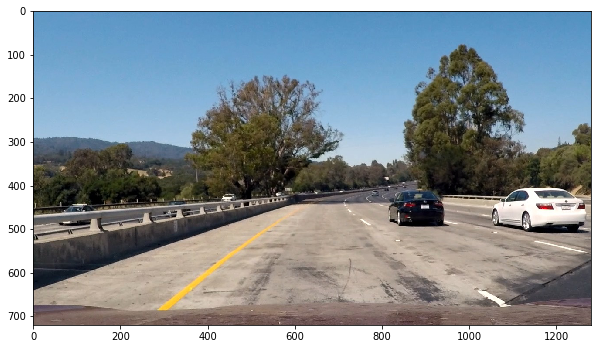

In [17]:
image_test = mpimg.imread('./test_images/test1.jpg')
plt.figure(figsize=(10,10))
plt.imshow(image_test)

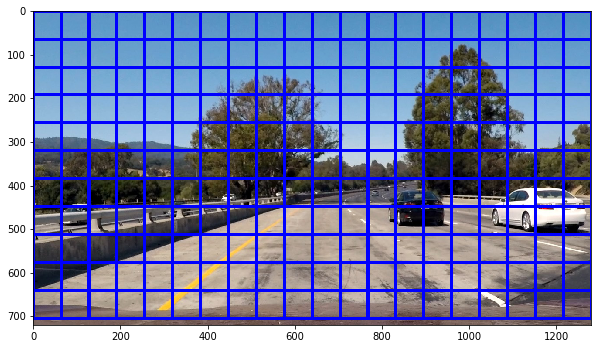

In [18]:
windows = slide_window(image_test, x_start_stop=[None, None], y_start_stop=[None, None], 
                    xy_window=(128, 128), xy_overlap=(0.5, 0.5))
# print(windows)
          
window_img = draw_boxes(image_test, windows, color=(0, 0, 255), thick=6)                    
plt.figure(figsize=(10,10))
plt.imshow(window_img)

In [38]:
# Define a function to extract features from a single image window
# This function is very similar to extract_features()
# just for a single image rather than list of images
def single_img_features(img, color_space='RGB', spatial_size=(32, 32),
                        hist_bins=32, orient=9, 
                        pix_per_cell=8, cell_per_block=2, hog_channel=0,
                        spatial_feat=True, hist_feat=True, hog_feat=True):    
    #1) Define an empty list to receive features
    img_features = []
    #2) Apply color conversion if other than 'RGB'
    if color_space != 'RGB':
        if color_space == 'HSV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
        elif color_space == 'LUV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2LUV)
        elif color_space == 'HLS':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
        elif color_space == 'YUV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
        elif color_space == 'YCrCb':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
    else: feature_image = np.copy(img)      
    #3) Compute spatial features if flag is set
    if spatial_feat == True:
        spatial_features = bin_spatial(feature_image, size=spatial_size)
        #4) Append features to list
        img_features.append(spatial_features)
    #5) Compute histogram features if flag is set
    if hist_feat == True:
        hist_features = color_hist(feature_image, nbins=hist_bins)
        #6) Append features to list
        img_features.append(hist_features)
    #7) Compute HOG features if flag is set
    if hog_feat == True:
        if hog_channel == 'ALL':
            hog_features = []
            for channel in range(feature_image.shape[2]):
                hog_features.extend(get_hog_features(feature_image[:,:,channel], 
                                    orient, pix_per_cell, cell_per_block, 
                                    vis=False, feature_vec=True))      
        else:
            hog_features = get_hog_features(feature_image[:,:,hog_channel], orient, 
                        pix_per_cell, cell_per_block, vis=False, feature_vec=True)
        #8) Append features to list
        img_features.append(hog_features)

    #9) Return concatenated array of features
    return np.concatenate(img_features)

# Define a function you will pass an image 
# and the list of windows to be searched (output of slide_windows())
def search_windows(img, windows, clf, scaler, color_space='RGB', 
                    spatial_size=(32, 32), hist_bins=32, 
                    hist_range=(0, 256), orient=9, 
                    pix_per_cell=8, cell_per_block=2, 
                    hog_channel=0, spatial_feat=True, 
                    hist_feat=True, hog_feat=True):

    #1) Create an empty list to receive positive detection windows
    on_windows = []
    #2) Iterate over all windows in the list
    for window in windows:
        #3) Extract the test window from original image
        test_img = cv2.resize(img[window[0][1]:window[1][1], window[0][0]:window[1][0]], (64, 64))      
        #4) Extract features for that window using single_img_features()
        features = single_img_features(test_img, color_space=color_space, 
                            spatial_size=spatial_size, hist_bins=hist_bins, 
                            orient=orient, pix_per_cell=pix_per_cell, 
                            cell_per_block=cell_per_block, 
                            hog_channel=hog_channel, spatial_feat=spatial_feat, 
                            hist_feat=hist_feat, hog_feat=hog_feat)
        #5) Scale extracted features to be fed to classifier
        test_features = scaler.transform(np.array(features).reshape(1, -1))
        #6) Predict using your classifier
        prediction = clf.predict(test_features)
        #7) If positive (prediction == 1) then save the window
        if prediction == 1:
            on_windows.append(window)
    #8) Return windows for positive detections
    return on_windows

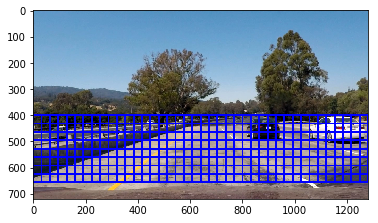

In [40]:
# image_test = mpimg.imread('./test_images/test1.jpg')
image = mpimg.imread('./test_images/test1.jpg')
draw_image = np.copy(image)

# Uncomment the following line if you extracted training
# data from .png images (scaled 0 to 1 by mpimg) and the
# image you are searching is a .jpg (scaled 0 to 255)
#image = image.astype(np.float32)/255

windows = slide_window(image, x_start_stop=[None, None], y_start_stop=[400,656], 
                    xy_window=(64, 64), xy_overlap=(0.5, 0.5))

hot_windows = search_windows(image, windows, svc, X_scaler, color_space=color_space, 
                        spatial_size=spatial_size, hist_bins=hist_bins, 
                        orient=orient, pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat)                       

window_img = draw_boxes(draw_image, hot_windows, color=(0, 0, 255), thick=6)                    

plt.imshow(window_img)

In [222]:
def convert_color(img, conv='RGB2YCrCb'):
    if conv == 'RGB2YCrCb':
        return cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
    if conv == 'BGR2YCrCb':
        return cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
    if conv == 'RGB2LUV':
        return cv2.cvtColor(img, cv2.COLOR_RGB2LUV)

def get_hog_features(img, orient, pix_per_cell, cell_per_block, 
                        vis=False, feature_vec=True):
    # Call with two outputs if vis==True
    if vis == True:
        features, hog_image = hog(img, orientations=orient, 
                                  pixels_per_cell=(pix_per_cell, pix_per_cell),
                                  cells_per_block=(cell_per_block, cell_per_block), 
                                  transform_sqrt=False, 
                                  visualise=vis, feature_vector=feature_vec)
        return features, hog_image
    # Otherwise call with one output
    else:      
        features = hog(img, orientations=orient, 
                       pixels_per_cell=(pix_per_cell, pix_per_cell),
                       cells_per_block=(cell_per_block, cell_per_block), 
                       transform_sqrt=False, 
                       visualise=vis, feature_vector=feature_vec)
        return features

def bin_spatial(img, size=(32, 32)):
    color1 = cv2.resize(img[:,:,0], size).ravel()
    color2 = cv2.resize(img[:,:,1], size).ravel()
    color3 = cv2.resize(img[:,:,2], size).ravel()
    return np.hstack((color1, color2, color3))
                        
def color_hist(img, nbins=32):    #bins_range=(0, 256)
    # Compute the histogram of the color channels separately
    channel1_hist = np.histogram(img[:,:,0], bins=nbins)
    channel2_hist = np.histogram(img[:,:,1], bins=nbins)
    channel3_hist = np.histogram(img[:,:,2], bins=nbins)
    # Concatenate the histograms into a single feature vector
    hist_features = np.concatenate((channel1_hist[0], channel2_hist[0], channel3_hist[0]))
    # Return the individual histograms, bin_centers and feature vector
    return hist_features

# rectangles = []

# Define a single function that can extract features using hog sub-sampling and make predictions
def find_cars(img, ystart, ystop, scale, svc, X_scaler, 
              orient, pix_per_cell, cell_per_block, spatial_size, hist_bins):
    draw_img = np.copy(img)
    img = img.astype(np.float32)/255
    
    rectangles = []
    
    img_tosearch = img[ystart:ystop,:,:]
    ctrans_tosearch = convert_color(img_tosearch, conv='RGB2YCrCb')
    if scale != 1:
        imshape = ctrans_tosearch.shape
        ctrans_tosearch = cv2.resize(ctrans_tosearch, (np.int(imshape[1]/scale), np.int(imshape[0]/scale)))
        
    ch1 = ctrans_tosearch[:,:,0]
    ch2 = ctrans_tosearch[:,:,1]
    ch3 = ctrans_tosearch[:,:,2]

    # Define blocks and steps as above
    nxblocks = (ch1.shape[1] // pix_per_cell)-1
    nyblocks = (ch1.shape[0] // pix_per_cell)-1 
    nfeat_per_block = orient*cell_per_block**2
    # 64 was the orginal sampling rate, with 8 cells and 8 pix per cell
    window = 64
    nblocks_per_window = (window // pix_per_cell)-1 
    cells_per_step = 2  # Instead of overlap, define how many cells to step
    nxsteps = (nxblocks - nblocks_per_window) // cells_per_step
    nysteps = (nyblocks - nblocks_per_window) // cells_per_step
    
    # Compute individual channel HOG features for the entire image
    hog1 = get_hog_features(ch1, orient, pix_per_cell, cell_per_block, feature_vec=False)
    hog2 = get_hog_features(ch2, orient, pix_per_cell, cell_per_block, feature_vec=False)
    hog3 = get_hog_features(ch3, orient, pix_per_cell, cell_per_block, feature_vec=False)
    
    for xb in range(nxsteps):
        for yb in range(nysteps):
            ypos = yb*cells_per_step
            xpos = xb*cells_per_step
            # Extract HOG for this patch
            hog_feat1 = hog1[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            hog_feat2 = hog2[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            hog_feat3 = hog3[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            hog_features = np.hstack((hog_feat1, hog_feat2, hog_feat3))
#             print(len(hog_features))
#             print(hog_features.shape)
            xleft = xpos*pix_per_cell
            ytop = ypos*pix_per_cell

            # Extract the image patch
            subimg = cv2.resize(ctrans_tosearch[ytop:ytop+window, xleft:xleft+window], (64,64))
          
            # Get color features
            spatial_features = bin_spatial(subimg, size=spatial_size)
            hist_features = color_hist(subimg, nbins=hist_bins)
#             print(len(spatial_features))
#             print(spatial_features.shape)
#             print(len(hist_features))
#             print(hist_features.shape)
            # Scale features and make a prediction
            test_features = X_scaler.transform(np.hstack((spatial_features, hist_features, hog_features)).reshape(1, -1))    
            #test_features = X_scaler.transform(np.hstack((shape_feat, hist_feat)).reshape(1, -1))    
#             test_features = X_scaler.transform(np.hstack((hog_features)).reshape(1, -1))    
            test_prediction = svc.predict(test_features)
            
            
            if test_prediction == 1:
                
                xbox_left = np.int(xleft*scale)
                ytop_draw = np.int(ytop*scale)
                win_draw = np.int(window*scale)
                rectangles.append(((xbox_left, ytop_draw+ystart),
                                   (xbox_left+win_draw,ytop_draw+win_draw+ystart)))
                for item in rectangles:
                    cv2.rectangle(draw_img,item[0],item[1],(0,0,255),6) 
                
    return draw_img, rectangles

  'be changed to `L2-Hys` in v0.15', skimage_deprecation)



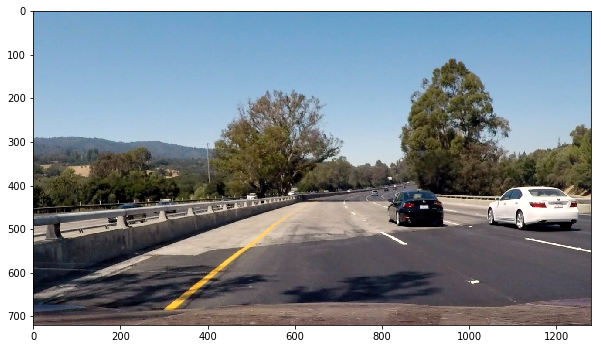

In [256]:
### TODO: Tweak these parameters and see how the results change.
orient = 11  # HOG orientations
pix_per_cell = 16 # HOG pixels per cell
cell_per_block = 2 # HOG cells per block
spatial_size = (32, 32) # Spatial binning dimensions
hist_bins = 16    # Number of histogram bins
hist_feat = True # Histogram features on or off

ystart = 400
ystop = 656
# scale = 2.5

img = mpimg.imread('./test_images/test4.jpg')

recktangles_test = []

for i in np.arange(1,2.5,0.1):
    scale = i
    out_img, recktangles = find_cars(img, ystart, ystop, scale, svc, X_scaler, 
                    orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)
    recktangles_test += recktangles

# out_img, recktangles = find_cars(img, ystart, ystop, scale, svc, X_scaler, 
#                 orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)

plt.figure(figsize=(10,10))
plt.imshow(out_img)
# print(recktangles)

## Heatmap

In [257]:
def add_heat(heatmap, bbox_list):
    # Iterate through list of bboxes
    for box in bbox_list:
        # Add += 1 for all pixels inside each bbox
        # Assuming each "box" takes the form ((x1, y1), (x2, y2))
        heatmap[box[0][1]:box[1][1], box[0][0]:box[1][0]] += 1

    # Return updated heatmap
    return heatmap# Iterate through list of bboxes
    
def apply_threshold(heatmap, threshold):
    # Zero out pixels below the threshold
    heatmap[heatmap <= threshold] = 0
    # Return thresholded map
    return heatmap

def draw_labeled_bboxes(img, labels):
    # Iterate through all detected cars
    for car_number in range(1, labels[1]+1):
        # Find pixels with each car_number label value
        nonzero = (labels[0] == car_number).nonzero()
        # Identify x and y values of those pixels
        nonzeroy = np.array(nonzero[0])
        nonzerox = np.array(nonzero[1])
        # Define a bounding box based on min/max x and y
        bbox = ((np.min(nonzerox), np.min(nonzeroy)), (np.max(nonzerox), np.max(nonzeroy)))
        # Draw the box on the image
        cv2.rectangle(img, bbox[0], bbox[1], (0,0,255), 6)
    # Return the image
    return img

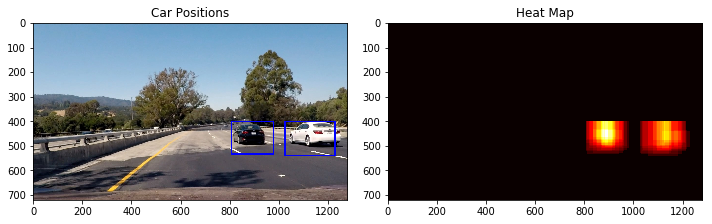

In [258]:
heat = np.zeros_like(img[:,:,0]).astype(np.float)

# Add heat to each box in box list
heat_rect = add_heat(heat, recktangles_test)

# Apply threshold to help remove false positives
heat_tresh = apply_threshold(heat_rect,1)

# Visualize the heatmap when displaying    
heatmap = np.clip(heat_tresh, 0, 255)

# Find final boxes from heatmap using label function
labels = label(heatmap)
draw_img = draw_labeled_bboxes(np.copy(img), labels)

fig = plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(draw_img)
plt.title('Car Positions')
plt.subplot(122)
plt.imshow(heatmap, cmap='hot')
plt.title('Heat Map')
fig.tight_layout()

# Process

In [262]:
def frame_by_frame(img):
    
#     recktangles = []
#     print('0',recktangles)
    
    recktangles_x = []
#     print('x0', recktangles_x)
    
#     for item in recktangles:
#         recktangles_x = recktangles_x.append(item)
#     print('x0', recktangles_x)
    
    orient = 11  # HOG orientations
    pix_per_cell = 16 # HOG pixels per cell
    cell_per_block = 2 # HOG cells per block
    spatial_size = (32, 32) # Spatial binning dimensions
    hist_bins = 16    # Number of histogram bins
    hist_feat = True # Histogram features on or off

    #1
    
    ystart = 400
    ystop = 656
    scale = 1
    
    for i in np.arange(1,2.5,0.2):
        scale = i
        out_img, recktangles = find_cars(img, ystart, ystop, scale, svc, X_scaler, 
                        orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)
        recktangles_x += recktangles
    
#     out_img, recktangles = find_cars(img, ystart, ystop, scale, svc, X_scaler, 
#                         orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)
    
# #     print(' 1',recktangles)
#     recktangles_x += recktangles
# #     print('x1', recktangles_x)
    
#     #2
    
#     ystart = 400
#     ystop = 656
#     scale = 1.1
    
#     out_img, recktangles = find_cars(img, ystart, ystop, scale, svc, X_scaler, 
#                         orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)
        
# #     print(' 2',recktangles)
#     recktangles_x += recktangles
# #     print('x2', recktangles_x)
    
#     #3
    
#     ystart = 400
#     ystop = 656
#     scale = 1.2
    
#     out_img, recktangles = find_cars(img, ystart, ystop, scale, svc, X_scaler, 
#                         orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)
        
# #     print(' 3',recktangles)
#     recktangles_x += recktangles
# #     print('x3', recktangles_x)
    
#     #4    
#     ystart = 400
#     ystop = 656
#     scale = 1.4
    
#     out_img, recktangles = find_cars(img, ystart, ystop, scale, svc, X_scaler, 
#                         orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)
        
# #     print(' 4',recktangles)
#     recktangles_x += recktangles
# #     print('x4', recktangles_x)
    
#     #5    
#     ystart = 400
#     ystop = 656
#     scale = 1.5
    
#     out_img, recktangles = find_cars(img, ystart, ystop, scale, svc, X_scaler, 
#                         orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)
    
#     recktangles_x += recktangles
    
    
#     #6    
#     ystart = 400
#     ystop = 656
#     scale = 1.6
    
#     out_img, recktangles = find_cars(img, ystart, ystop, scale, svc, X_scaler, 
#                         orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)
    
#     recktangles_x += recktangles
    
#     #7    
#     ystart = 400
#     ystop = 656
#     scale = 1.8
    
#     out_img, recktangles = find_cars(img, ystart, ystop, scale, svc, X_scaler, 
#                         orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)
    
#     recktangles_x += recktangles
    
#     #9    
#     ystart = 400
#     ystop = 656
#     scale = 1.9
    
#     out_img, recktangles = find_cars(img, ystart, ystop, scale, svc, X_scaler, 
#                         orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)
    
#     recktangles_x += recktangles
    
    heat = np.zeros_like(img[:,:,0]).astype(np.float)
    # Add heat to each box in box list
    heat_rect = add_heat(heat, recktangles_x)
    # Apply threshold to help remove false positives
    heat_tresh = apply_threshold(heat_rect,1)
    # Visualize the heatmap when displaying    
    heatmap = np.clip(heat_tresh, 0, 255)

    # Find final boxes from heatmap using label function
    labels = label(heatmap)
    draw_img = draw_labeled_bboxes(np.copy(img), labels)
    
    return draw_img

  'be changed to `L2-Hys` in v0.15', skimage_deprecation)



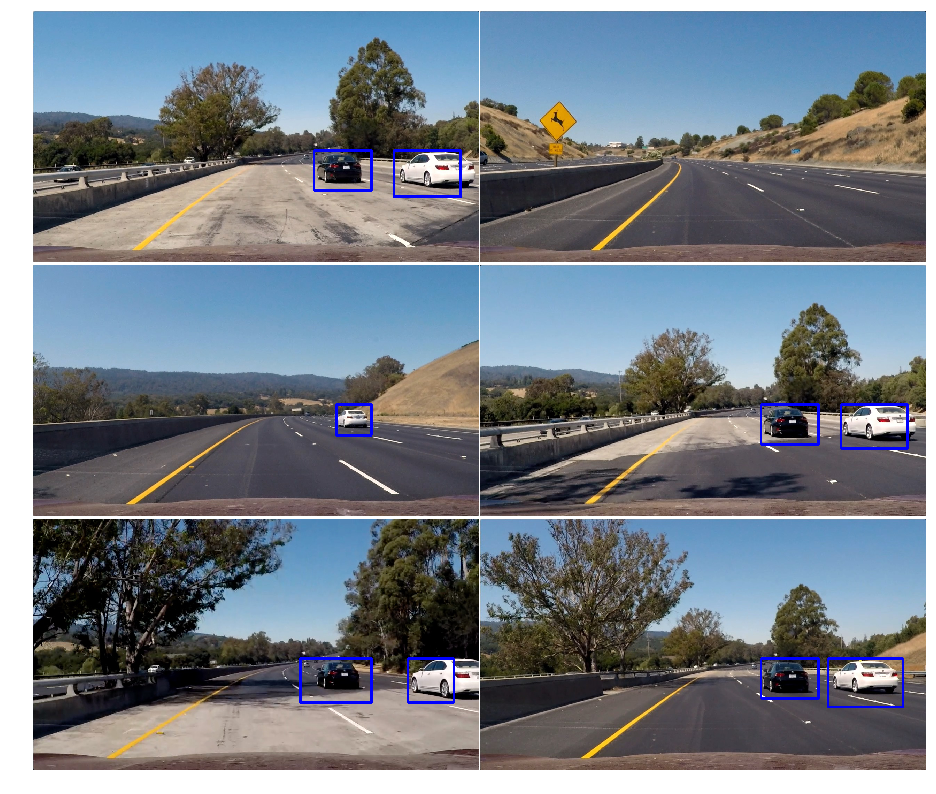

In [263]:
test_images = glob.glob('./test_images/test*.jpg')

fig, axs = plt.subplots(3, 2, figsize=(16,14))
fig.subplots_adjust(hspace = .004, wspace=.002)
axs = axs.ravel()

for i, img in enumerate(test_images):
    axs[i].imshow(frame_by_frame(mpimg.imread(img)))
    axs[i].axis('off')

In [264]:
test_out_file = 'test_video_out.mp4'
clip_test = VideoFileClip('test_video.mp4')
clip_test_out = clip_test.fl_image(frame_by_frame)
%time clip_test_out.write_videofile(test_out_file, audio=False)

  self.nchannels))

  'be changed to `L2-Hys` in v0.15', skimage_deprecation)



[MoviePy] >>>> Building video test_video_out.mp4
[MoviePy] Writing video test_video_out.mp4


  0%|                                                   | 0/39 [00:00<?, ?it/s]WARNING:py.warnings:C:\Program Files\Anaconda3\envs\carnd-term1\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)

 97%|████████████████████████████████████████▉ | 38/39 [02:25<00:03,  3.90s/it]


[MoviePy] Done.
[MoviePy] >>>> Video ready: test_video_out.mp4 

Wall time: 2min 27s


In [265]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(test_out_file))

In [ ]:
test_out_file_2 = 'test_video_out_2.mp4'
clip_test_2 = VideoFileClip('project_video.mp4')
clip_test_out_2 = clip_test_2.fl_image(frame_by_frame)
%time clip_test_out_2.write_videofile(test_out_file_2, audio=False)

  self.nchannels))

  'be changed to `L2-Hys` in v0.15', skimage_deprecation)



[MoviePy] >>>> Building video test_video_out_2.mp4
[MoviePy] Writing video test_video_out_2.mp4


  0%|                                                 | 0/1261 [00:00<?, ?it/s]WARNING:py.warnings:C:\Program Files\Anaconda3\envs\carnd-term1\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)

 35%|█████████████▊                         | 446/1261 [29:16<52:55,  3.90s/it]

In [142]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(test_out_file_2))